# **I. Introduction**

## 1.1. Identity
Name: Ma'ruf Habibie Siregar  
**This program is created to assist medical professionals in the early detection of diabetes** so that early treatment can be administered and the risk of more serious complications can be prevented.

Deployment link: [DiabetesED](https://earlydiabetesdetect.streamlit.app/)


## 1.2. Background and Problem Statement  
### 1.2.1. Background
**Excessive sugar consumption** has become a **serious health issue** that is often overlooked. This occurs across all age groups due to the easy access to **sweet foods and drinks** in various places such as **supermarkets, minimarkets, local stalls, and street food vendors**. This situation is very concerning because continuous sugar intake can increase the **risk of diabetes**.

**Diabetes** is one of the **leading causes of death worldwide**. **Early detection of diabetes is crucial** to minimize the risk of complications. With **early detection** in the community, medical professionals, parents, and families can take preventive measures to reduce the risk of more severe complications in the future. Therefore, there is a need for an **early diabetes detection method** to assist parents, families, and medical personnel in preventing more serious risks and enabling early treatment.

### 1.2.2. Problem Statement
Developing a **machine learning** model to **detect early symptoms of diabetes in the community**, so that it can help medical professionals, parents, and families prevent **more severe complications in the future**.

# **II. Import Libraries**
Here, I will list the libraries that I will use. These libraries will be added gradually.

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle

# **III. Data Loading**

Here, I will load the dataset required for building the machine learning model.

In [3]:
#Load csv
df = pd.read_csv('diabetes_data_upload.csv')

In [4]:
#Check the first 5 rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
#Check the last 5 rows
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


Column Name Descriptions

| Column Name         | Description                                                                                              |
|---------------------|----------------------------------------------------------------------------------------------------------|
| Age                 | Patient's age                                                                                            |
| Gender              | Patient's gender (Female = female, Male = male)                                                          |
| Polyuria            | Frequent urination, a common symptom of diabetes                                                         |
| Polydipsia          | Excessive thirst                                                                                         |
| Sudden weight loss  | Sudden loss of body weight                                                                               |
| Weakness            | Physical weakness                                                                                        |
| Polyphagia          | Excessive hunger or increased appetite                                                                   |
| Genital thrush      | Fungal infection in the genital area                                                                     |
| Visual blurring     | Blurred vision                                                                                           |
| Itching             | Itching on body parts                                                                                    |
| Irritability        | Easily angered or agitated                                                                               |
| Delayed healing     | Wounds that take a long time to heal                                                                     |
| Partial paresis     | Weakness or partial paralysis of muscles                                                                 |
| Muscle stiffness    | Muscle stiffness                                                                                         |
| Alopecia            | Baldness or hair loss                                                                                    |
| Obesity             | Overweight                                                                                               |
| Class               | Diabetes diagnosis result (Positive = diagnosed with diabetes, Negative = not diabetic)                  |

In [6]:
#Check dataset shape
print('Dataset size:', df.shape)

Dataset size: (520, 17)


**Insight**:

From the information above, I found that the dataset has **520 rows and 17 columns**.

In [7]:
#Check target distribution
jumlah_class = df['class'].value_counts()  # Count the number of positive and negative classes
persen_jumlah_class = df['class'].value_counts(normalize=True)*100  # Convert positive and negative counts to percentages
result_jumlah_class = pd.DataFrame({'Class Count': jumlah_class, 'Percentage(%)': persen_jumlah_class})  # Convert to dataframe
result_jumlah_class

,Class Count,Percentage(%)
class,,
Positive,320,61.538462
Negative,200,38.461538


In [8]:
#Check Imbalance Ratio
IR = 320/200
print(IR)

1.6


**Insight:**

From the distribution check above, I assume that the data falls into the **mild imbalance** category [reference](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets) because the **Imbalance Ratio is 1.6**.

In [9]:
#Check duplicates
total_duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {total_duplicate_rows}")

Total number of duplicate rows: 269


**Insight:**  

From the **duplicate** check above, there are **269 duplicate entries**. I assume these duplicates are **normal** based on the descriptions in the features/columns, as it is possible for symptoms to be the same among different patients who are either **positive or negative for diabetes**. Therefore, I will leave the duplicate data as it is because it occurs **naturally**, and there is no **ID** feature that typically distinguishes individuals.

In [10]:
#Check Missing Values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Insight:**  
From the information above, I found that there are **no missing values** in the dataset.

In [11]:
#Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

**Insight:**  
1. **Inconsistency in feature names**, where some start with capital letters and others do not.  
2. There are **spaces between words**.  
3. **Data types are appropriate**.  

I will make changes to the feature names by **converting them all to lowercase** and **adding underscores ("_") between words**. This helps to standardize the column names and makes future processing easier.

In [12]:
#Convert feature and target names to lowercase and add underscores between words
df.columns = df.columns.str.lower().str.replace(' ', '_')

#Check dataset info to confirm the column names have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

**Insight:**  
Feature names have been successfully updated.

# **IV. Exploratory Data Analysis (EDA)**

In this chapter, I will perform several data explorations. During the process, I will use a duplicated dataframe from the original one to avoid altering the original dataframe.

In [13]:
#Copy dataframe for EDA
df_eda = df.copy()

Questions for Data Exploration

1. What are the **average age, median age, minimum age, and maximum age** of patients diagnosed as **positive for diabetes**?
2. Do patients who are **positive for diabetes often experience delayed wound healing**?
3. What is the **relationship between being overweight and testing positive for diabetes**?
4. **Which symptom is most frequently found** in individuals diagnosed as positive for diabetes?
5. Is there any **relationship between age and delayed healing**?
6. Are there any individuals who are **positive for diabetes but show no symptoms**?
7. Do individuals who test positive for diabetes commonly experience **frequent urination (Polyuria)** and **excessive thirst (Polydipsia)**?

## 4.1. Average age, median age, minimum age, and maximum age of patients who are positive for diabetes

In [14]:
# Filter data for patients diagnosed as positive for diabetes
df_positif = df_eda[df_eda['class'] == 'Positive']
df_positif.describe()

,age
count,320.000000
mean,49.071875
std,12.097481
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,90.000000


Text(0, 0.5, 'Age')

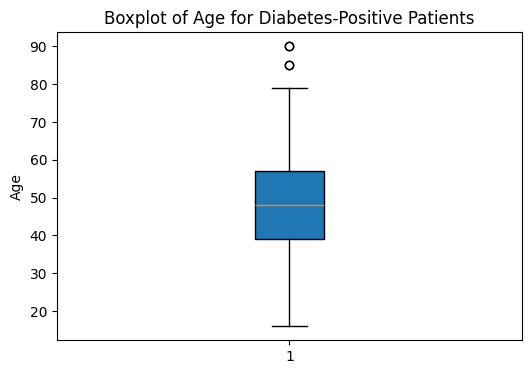

In [15]:
#Create boxplot
plt.figure(figsize=(6,4))
plt.boxplot(df_positif['age'], patch_artist=True)
plt.title('Boxplot of Age for Diabetes-Positive Patients')
plt.ylabel('Age')

**Insight**  
1. **The average age of diabetes-positive patients is 49**, and the **median is 48**.  
2. **The minimum age among diabetes-positive patients is 16**, meaning that although the average is around 48, **diabetes can also occur at a young age**.  
3. **The maximum age of diabetes patients is 90**, showing that elderly individuals are still at risk of developing early-stage diabetes.  
   This supports the importance of **regular screening for all age groups, including the elderly.**

This aligns with medical literature stating that **the risk of diabetes increases with age, especially after 40 years old.**  
However, the data above also shows the presence of young patients, as young as 16 years old.  
This indicates that **other risk factors (such as genetics and diet) also contribute to the onset of diabetes at a young age.**

Reference: [CDC - Diabetes Basics](https://www.cdc.gov/diabetes/about/?CDC_AAref_Val=https://www.cdc.gov/diabetes/basics/diabetes.html)

## 4.2. The effect of diabetes-positive patients on delayed wound healing

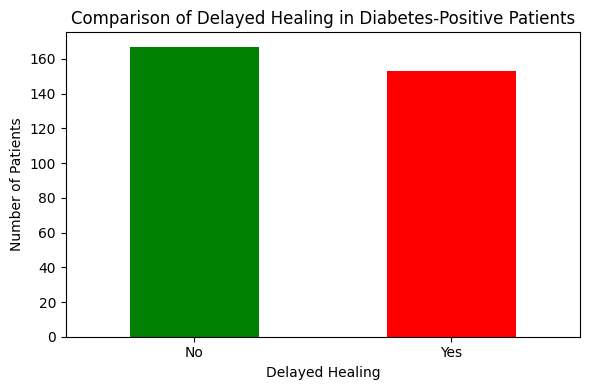

In [16]:
#Count the number of diabetes-positive patients with and without delayed healing
delayed_healing_counts = df_positif['delayed_healing'].value_counts()

#Create bar chart
plt.figure(figsize=(6,4))
delayed_healing_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Comparison of Delayed Healing in Diabetes-Positive Patients')
plt.xlabel('Delayed Healing')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**:

From the chart above, we can conclude that in early-stage diabetes, **Delayed Healing is not the only factor to determine whether a patient is positive for diabetes.**  
In early stages, **blood sugar levels may not yet be high enough to significantly affect tissue regeneration.**  
This symptom is usually more prominent in advanced stages of diabetes due to **capillary damage and a weakened immune system.**

Reference: [Halodoc - Why Wounds Heal More Slowly in Diabetes Patients](https://www.halodoc.com/artikel/ini-alasan-luka-lebih-susah-sembuh-pada-pengidap-diabetes)

I will now check the correlation to see whether delayed healing truly affects diabetes-positive patients in the early stage.  
Here I will use the **Chi-square** method because both columns are categorical.

    Hypotheses:
    H0 = There is no relationship between delayed wound healing and diabetes diagnosis  
    H1 = There is a relationship between delayed wound healing and diabetes diagnosis

In [17]:
#Check correlation between delayed healing and diabetes diagnosis using Chi-square test
contingency_table1 = pd.crosstab(df_eda['delayed_healing'], df_eda['class'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 0.962
P-value: 0.327


**Insight**:  

- From the correlation test result above, where the **p-value > 0.05**, it further confirms that **there is no relationship between delayed healing and a patient being diagnosed as positive or negative for early-stage diabetes.**  
- Therefore, **H1 is rejected.**


## 4.3. Relationship between being overweight and testing positive for diabetes

Since both the obesity feature and the target class are categorical, I will use the Chi-square method to examine their relationship.

    Hypotheses:
    H0 = There is no relationship between obesity and diabetes diagnosis  
    H1 = There is a relationship between obesity and diabetes diagnosis

In [18]:
#Check correlation between obesity and diabetes diagnosis using Chi-square test
contingency_table2 = pd.crosstab(df_eda['obesity'], df_eda['class'])

chi2, p, dof, expected = chi2_contingency(contingency_table2)
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 2.327
P-value: 0.127


**Insight**:  

From the correlation result above, we can conclude that **H1 is not accepted because the p-value > 0.05**. This means that **there is not enough evidence to suggest a relationship between obesity and a patient's positive diabetes status**. Although obesity is a risk factor for type 2 diabetes, not all early-stage diabetes patients are obese. This could be influenced by genetic factors, insulin resistance, or other risky lifestyle choices — even individuals with normal body weight may be diagnosed with diabetes.  

Reference: [aido.id - Obesity as a Trigger Factor for Diabetes](https://aido.id/health-articles/obesitas-menjadi-faktor-pemicu-penyakit-diabetes/detail)

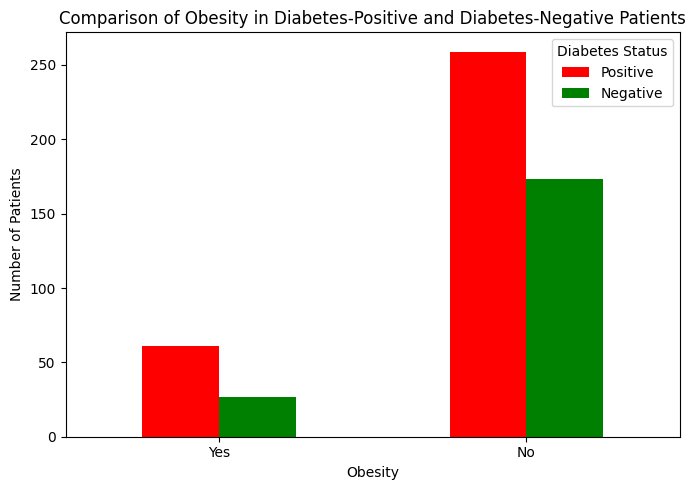

In [19]:
#Create bar chart comparing obesity in positive and negative diabetes patients

df_negatif = df_eda[df_eda['class'] == 'Negative']

obesity_pos_counts = df_positif['obesity'].value_counts()
obesity_neg_counts = df_negatif['obesity'].value_counts()

# Combine into one DataFrame for easier plotting
data_compare = pd.DataFrame({
    'Positive': obesity_pos_counts,
    'Negative': obesity_neg_counts
})

# Ensure index order is consistent (usually 'Yes' and 'No')
data_compare = data_compare.reindex(['Yes', 'No'])

# Plot bar chart comparing diabetes-positive and diabetes-negative patients based on obesity status
ax = data_compare.plot(kind='bar', figsize=(7, 5), color=['red', 'green'])
plt.title('Comparison of Obesity in Diabetes-Positive and Diabetes-Negative Patients')
plt.xlabel('Obesity')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.show()

**Insight**:  
The chart above further supports that **not all individuals with obesity are indicated as positive for early-stage diabetes.**

## 4.4. Relationship between age and delayed wound healing?

In [20]:
#Check skewness of the age feature
df_eda['age'].skew()

0.3293593578272701

**Insight**:  

From the result above, I conclude that the **age distribution is normal** due to the small skewness value. Therefore, I will **use the T-test statistical method, since the delayed healing feature is categorical**.

    Hypotheses:
    H0 = There is no relationship between age and delayed wound healing  
    H1 = There is a relationship between age and delayed wound healing

In [21]:
#T-test

# Age data grouped by delayed_healing category
age_delayed_yes = df_eda[df_eda['delayed_healing'] == 'Yes']['age']
age_delayed_no = df_eda[df_eda['delayed_healing'] == 'No']['age']

# Calculate t-statistic and p-value using independent t-test
t_stat, p_val = stats.ttest_ind(age_delayed_yes, age_delayed_no)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: 6.065
P-value: 0.000


**Insight**:  
1. The **t-statistic indicates a relationship between age and delayed healing**, showing a distinct age characteristic in patients who experience delayed healing.  
2. The **p-value is 0**, suggesting that this relationship is **not due to chance, meaning H0 is rejected.**  
3. Therefore, I will check the strength of this relationship using **Cohen's d** method.

In [22]:
#Calculate Cohen's d
mean1 = np.mean(age_delayed_yes)
mean2 = np.mean(age_delayed_no)
std1 = np.std(age_delayed_yes, ddof=1)
std2 = np.std(age_delayed_no, ddof=1)
n1 = len(age_delayed_yes)
n2 = len(age_delayed_no)

# Pooled Standard Deviation
pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

cohen_d = (mean1 - mean2) / pooled_std

print(f"Cohen's d = {cohen_d}")

Cohen's d = 0.5336927063644619


**Insight**:  
From the Cohen's d result above, it appears that there is a **moderate relationship between age and delayed wound healing**.

<Figure size 1000x600 with 0 Axes>

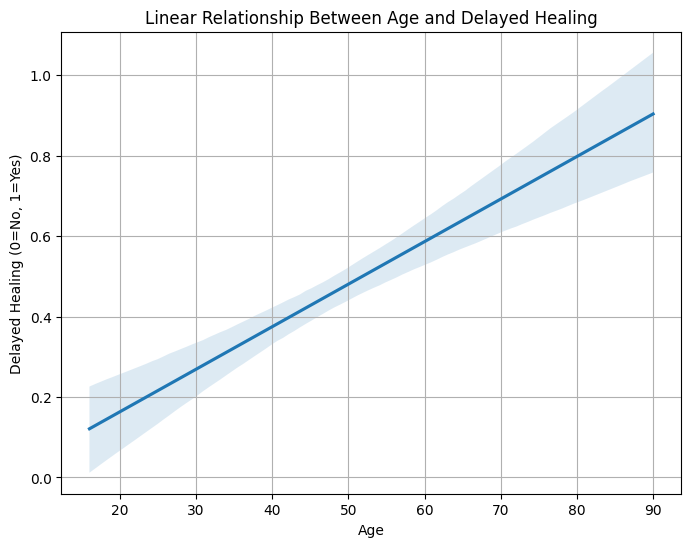

In [23]:
plt.figure(figsize=(10,6))

# Convert delayed_healing to numeric (Yes=1, No=0)
df_eda['delayed_healing_numeric'] = df_eda['delayed_healing'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(8,6))

#Create scatter plot with regression line
sns.regplot(
    x='age',
    y='delayed_healing_numeric',
    data=df_eda,
    scatter=False,  # hide scatter points
)
#Display plot of the relationship between age and delayed healing
plt.xlabel('Age')
plt.ylabel('Delayed Healing (0=No, 1=Yes)')
plt.title('Linear Relationship Between Age and Delayed Healing')
plt.grid(True)
plt.show()

**Conclusion**:

The line plot above also reinforces that there is a **linear relationship between age and delayed healing.** As age (x-axis) increases, the risk of experiencing delayed healing (y-axis) also rises. This is evident from the gradually increasing line corresponding to the patients' increasing age. It is therefore reasonable that elderly patients are more prone to slow wound healing, not only due to diabetes. Based on the **Cohen's d result, the strength of the relationship is moderate**, indicating other factors influence delayed healing besides age. Hence, the conclusion can also be drawn that **not only diabetes positivity causes slow wound healing, but age also plays a role.**

Reference: [kumparanmom: muscle mass declines since the 30s](https://kumparan.com/kumparanmom/massa-otot-menyusut-sejak-usia-30-tahun-yuk-perhatikan-ini-moms-23F2kz3V66p)

## 4.5. Identifying individuals who are positive for diabetes but without symptoms

C:\Users\maruf\AppData\Local\Temp\ipykernel_27476\1635659179.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['total_symptoms'] = df_positif.apply(count_yes, axis=1)


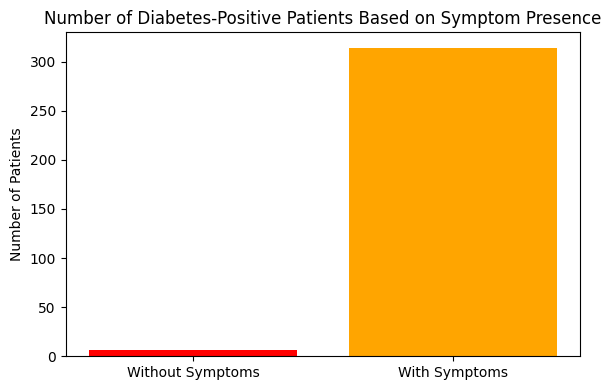

In [24]:
symptom_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush',
                'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
                'muscle_stiffness', 'alopecia', 'obesity']

# Function to count 'Yes' occurrences in symptom columns per row
def count_yes(row):
    count = 0
    for col in symptom_cols:
        if row[col] == 'Yes':
            count += 1
    return count

# Calculate total symptoms for each diabetes-positive patient
df_positif['total_symptoms'] = df_positif.apply(count_yes, axis=1)

# Count patients without symptoms (total_symptoms == 0)
no_symptoms_count = df_positif[df_positif['total_symptoms'] == 0].shape[0]

# Count patients with symptoms (total_symptoms > 0)
with_symptoms_count = df_positif[df_positif['total_symptoms'] > 0].shape[0]

# Prepare data for plotting
counts = [no_symptoms_count, with_symptoms_count]
labels = ['Without Symptoms', 'With Symptoms']

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['red', 'orange'])
plt.title('Number of Diabetes-Positive Patients Based on Symptom Presence')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

**Insight**:  

From the chart above, I can conclude that there are indeed patients who are **diabetes-positive without symptoms**, but their number is very **small**. This indicates cases of **asymptomatic diabetes in the early stage.** This often occurs, especially in patients unaware of their risk factors or when symptoms are still very mild and do not interfere with daily activities.

Reference: [diabetes.org : diabetes signs and symptoms](https://www.diabetes.org.uk/about-diabetes/symptoms)

## 4.6. Number of diabetes-positive individuals experiencing frequent urination (Polyuria) and excessive thirst (Polydipsia)

In [25]:
#Count total diabetes-positive patients and those with both polyuria and polydipsia symptoms
total_positif = df_positif.shape[0]
polyuria_polydipsia_count = df_positif[(df_positif['polyuria'] == 'Yes') & (df_positif['polydipsia'] == 'Yes')].shape[0]
print(f"Number of diabetes-positive patients with Polyuria and Polydipsia symptoms is {polyuria_polydipsia_count} out of {total_positif}")

Number of diabetes-positive patients with Polyuria and Polydipsia symptoms is 193 out of 320


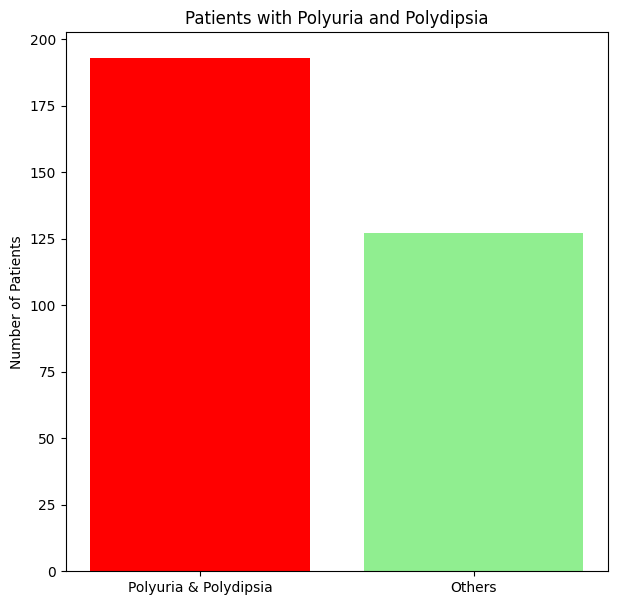

In [26]:
#Create bar plot
plt.figure(figsize=(7,7))
plt.bar(['Polyuria & Polydipsia', 'Others'], [polyuria_polydipsia_count, df_positif.shape[0]-polyuria_polydipsia_count], color=['red','lightgreen'])
plt.title('Patients with Polyuria and Polydipsia')
plt.ylabel('Number of Patients')
plt.show()

**Insight**:   

- From the bar chart above, I conclude that **polyuria and polydipsia are two key symptoms indicating diabetes-positive patients.**  
- Polyuria (frequent urination) and polydipsia (excessive thirst) occur because the body tries to expel excess glucose through urine, which pulls fluid from tissues.  
- These are the **earliest and most characteristic physiological symptoms of diabetes,** so it is not surprising that the chart shows their dominance.

Reference: [clevelandclinic : When a person has little insulin](https://my.clevelandclinic.org/health/diseases/21945-diabetic-ketoacidosis-dka?utm)

## 4.7. Gejala yang paling sering ditemui saat seorang terindikasi positif diabetes

In [27]:
#Identify the most common symptoms in diabetes patients
symptom_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush',
                'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
                'muscle_stiffness', 'alopecia', 'obesity']

#Sort the frequency of symptoms in diabetes-positive patients, from most to least common
symptom_frequency = df_positif[symptom_cols].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False)

symptom_frequency

polyuria              243
polydipsia            225
weakness              218
partial_paresis       192
polyphagia            189
sudden_weight_loss    188
visual_blurring       175
itching               154
delayed_healing       153
muscle_stiffness      135
irritability          110
genital_thrush         83
alopecia               78
obesity                61
dtype: int64

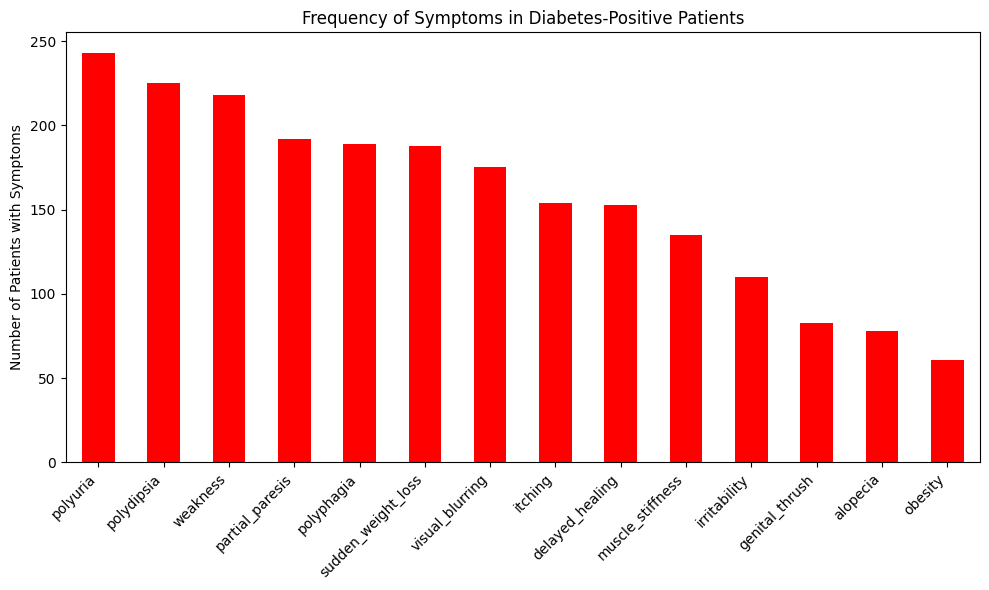

In [28]:
#Create symptom frequency plot
plt.figure(figsize=(10,6))
symptom_frequency.plot(kind='bar', color='red')
plt.title('Frequency of Symptoms in Diabetes-Positive Patients')
plt.ylabel('Number of Patients with Symptoms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight**:   

From the results above, I conclude that there are **5 symptoms that occur most frequently in diabetes-positive patients, namely**:  

1. **polyuria** (frequent urination) = 243 patients  
2. **polydipsia** (excessive thirst) = 225 patients  
3. **weakness** (physical weakness) = 218 patients  
4. **partial paresis** (muscle weakness or paralysis) = 192 patients  
5. **polyphagia** (excessive hunger or appetite) = 189 patients  

These symptoms result from the body’s **inability to effectively use glucose**, leading to decreased energy, muscle weakness (paresis), and a physiological response to eat/drink more.  
This is a biological symptom chain that appears early in diabetes.  

Reference: [health.grid.id : early signs of diabetes often overlooked](https://health.grid.id/read/353596036/inilah-polifagia-tanda-awal-diabetes-tipe-2-yang-sering-terabaikan?page=all)

# **V. Feature Enginerring**

At this stage, I will perform several data transformations to create features that facilitate the model's learning and prediction process.

## 5.1. Cardinality Check

At this stage, I will check the cardinality of categorical columns. Here, I will only select those with low cardinality for the following reasons:

1. To simplify the machine learning process by reducing the complexity of the features  
2. To prevent the risk of overfitting, where columns with high cardinality may cause the model to "memorize" data instead of learning the underlying patterns.

Reference: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [29]:
#Check Cardinality

pd.set_option('display.max_colwidth', None)  # Maximize column width so values are not truncated

cat_cols_df = list(df.select_dtypes(include='object').columns)  # List all columns with object datatype

listItem = []  # Create empty list
for col in cat_cols_df:
    '''Method to check unique values in categorical columns in df'''
    listItem.append([col, df[col].nunique(), df[col].unique()])  # Append unique values info to list

pd.DataFrame(columns=['column_name', 'unique_value_count', 'unique_values'], data=listItem)  # Convert list to dataframe

,column_name,unique_value_count,unique_values
0,gender,2,"[Male, Female]"
1,polyuria,2,"[No, Yes]"
2,polydipsia,2,"[Yes, No]"
3,sudden_weight_loss,2,"[No, Yes]"
4,weakness,2,"[Yes, No]"
5,polyphagia,2,"[No, Yes]"
6,genital_thrush,2,"[No, Yes]"
7,visual_blurring,2,"[No, Yes]"
8,itching,2,"[Yes, No]"
9,irritability,2,"[No, Yes]"


**Insight**:  

From the cardinality check results above, I found that **all categorical columns have low cardinality**, so there are no features that need to be removed.

## 5.2. Split Dataset

At this stage, I will split the dataset into features and target.

In [30]:
# Splitting dataset into Features and Target
X = df.drop(['class'], axis=1)  # features
y = df['class']  # target

In [31]:
#Check features and target
X.head()  # check features

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [32]:
y.head() #check target

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: class, dtype: object

**Insight**:  

The dataset has been **split into Features and Target**. Next, I will **split the dataset into Train and Test sets** with an **80-20 ratio**. This is important to **prevent data leakage** and ensure the model is **truly tested on unseen real data**, i.e., the test data.

Reference: https://www.techtarget.com/searchenterpriseai/definition/data-splitting

In [33]:
#Splitting data train and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (416, 16)
Test Size (104, 16)


**Insight**:  

From the above information, the dataset has been split as follows:

1. Training dataset contains **416 rows and 16 columns**  
2. Test dataset contains **104 rows and 16 columns**

## 5.3. Missing Values Handling

Missing values were actually checked in CHAPTER 3 (Data Loading), but I will recheck to confirm that there are truly no missing values.

In [34]:
#Cek missing value on X_train
X_train.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [35]:
#Cek missing value on X_test
X_test.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [36]:
#Cek missing value on y_train
y_train.isnull().sum()

0

In [37]:
#Cek missing value on y_test
y_test.isnull().sum()

0

**Insight**:  

From my train and test dataset, it appears that **THERE ARE NO MISSING VALUES**

## 5.4. Handle Outliers

Before determining outliers, I will examine the skewness of the numeric columns. From this dataset, I see that there is only **1 numeric column**, namely **'age'**.

In [38]:
#check info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 63 to 32
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 416 non-null    int64 
 1   gender              416 non-null    object
 2   polyuria            416 non-null    object
 3   polydipsia          416 non-null    object
 4   sudden_weight_loss  416 non-null    object
 5   weakness            416 non-null    object
 6   polyphagia          416 non-null    object
 7   genital_thrush      416 non-null    object
 8   visual_blurring     416 non-null    object
 9   itching             416 non-null    object
 10  irritability        416 non-null    object
 11  delayed_healing     416 non-null    object
 12  partial_paresis     416 non-null    object
 13  muscle_stiffness    416 non-null    object
 14  alopecia            416 non-null    object
 15  obesity             416 non-null    object
dtypes: int64(1), object(15)
memory 

In [39]:
# Check skewness in numeric feature
Cek_skewness_X_train = X_train['age'].skew()
# If greater than 0.05 or less than -0.05, considered skewed
if Cek_skewness_X_train >= 0.05 and Cek_skewness_X_train <= -0.05:
    print("skew")
else:
    print("normal")

normal


**Insight**:  

From the skewness check results above, it means the **'age'** feature is **normal**, so **no outlier handling is needed**.

## 5.5. Split Categorical Column and Numerical Column

I will split the columns based on their **categorical** and **numerical** types. This is because later the **numerical features** will be scaled, and the **categorical features** will be encoded.

In [40]:
# Split Numerical and Categorical Columns
num_columns_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns_X = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(num_columns_X)
print(cat_columns_X)

['age']
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


**Insight**:  

The **categorical features have been split**.

## 5.6. Feature Selection

In [41]:
# Check skewness of the numerical feature ('age')
X['age'].skew()

0.3293593578272701

At this stage, I will perform feature selection by examining the correlation of features with the target. To check the correlation, I will use:  
1. **T-test method** for the numerical feature (**age**) with the categorical target (**positive/negative**)  
2. **Chi-Square method** for the categorical features with the categorical target (**positive/negative**)

In [42]:
# Check correlation of numerical feature with target

num_column = num_columns_X[0]  # take the single column name from the list

# Group negative and positive diabetes
group_negatif = X_train.loc[y_train == 'Negative', num_column]
group_positif = X_train.loc[y_train == 'Positive', num_column]

if len(group_negatif) > 0 and len(group_positif) > 0:  # Check if either negative or positive group is empty; if so, t-test cannot be performed
    stat, p_value = ttest_ind(group_negatif, group_positif, equal_var=False)  # perform t-test
    interpretasi = f'Significant difference (p={p_value:.4f}), t-stat: {stat:.3f}' if p_value < 0.05 else f'Not significant (p={p_value:.4f}), t-stat: {stat:.3f}'
else:
    interpretasi = 'Insufficient data in one of the groups'
    p_value = None

hasil_korelasi = pd.DataFrame({
    'Numerical Feature': [num_column],
    'Interpretation': [interpretasi],
    'p-value': [p_value]
})

hasil_korelasi

,Numerical Feature,Interpretation,p-value
0,age,"Not significant (p=0.0723), t-stat: -1.803",0.07231


**Insight**:  

1. **t stats = -1.8** indicates that the **average age for those with positive diabetes is lower than the average age for those with negative diabetes.**  
2. **p value > 0.05** indicates **no evidence that the age of positive and negative diabetes cases differs significantly.**  
3. **There is no significant difference between the Positive and Negative classes based on age.**

Based on the results, I will still use the **age** feature for the following reasons:  

1. In the context of medical or health conditions, **age can be relevant to a patient’s condition**, for example: after the age of 30, muscle mass begins to decrease each year.  
Source: [kumparan.com: muscle mass decreases starting from age 30](https://kumparan.com/kumparanmom/massa-otot-menyusut-sejak-usia-30-tahun-yuk-perhatikan-ini-moms-23F2kz3V66p)  
2. **The older a person is, the higher the likelihood they may develop diabetes.**  
Source: [alodokter.com: diabetes risk factors and how to manage them](https://www.alodokter.com/ketahui-faktor-risiko-diabetes-dan-cara-mengendalikannya)  
3. To ensure the model **does not rely solely on categorical features**.  
4. It is possible that models **like random forest and boosting can capture non-linear patterns**.

In [43]:
def cramers_v(confusion_matrix):
    '''This function is used to calculate Cramer's V value,
    which measures the strength of association between two categorical variables
    based on a contingency table (confusion matrix).'''
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


p_values_cat = []
signifikan_cat = []
cols_cat = []
cramers_v_values = []

for col in cat_columns_X:
    # Create a contingency table between the current categorical feature and the target (y)
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Check if the contingency table has at least 2 rows and 2 columns
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        # Perform chi-square test to determine the relationship between the feature and target (y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Store the p-value and categorical feature name
        p_values_cat.append(p_value)
        cols_cat.append(col)
        
        # Determine if the relationship is significant based on p-value < 0.05
        if p_value < 0.05:
            signifikan_cat.append('Significant difference')
        else:
            signifikan_cat.append('Not significant')

        # Calculate Cramer's V
        cv = cramers_v(contingency_table)
        cramers_v_values.append(cv)
    else:
        # If there is insufficient variation, fill with None or print "data lacks sufficient variation"
        p_values_cat.append(None)
        cols_cat.append(col)
        signifikan_cat.append('Data lacks sufficient variation')
        cramers_v_values.append(None)

# If successful, store the data here
result_cat = pd.DataFrame({
    'Feature Name': cols_cat,
    'Relationship': signifikan_cat,
    'p-value': p_values_cat,
    "Cramer's V": cramers_v_values
})
result_cat

,Feature Name,Relationship,p-value,Cramer's V
0,gender,Significant difference,7.031335e-20,0.445333
1,polyuria,Significant difference,6.566118e-39,0.638590
2,polydipsia,Significant difference,2.494900e-37,0.624797
3,sudden_weight_loss,Significant difference,6.542496e-19,0.433243
4,weakness,Significant difference,1.226955e-05,0.208948
5,polyphagia,Significant difference,6.195205e-11,0.317201
6,genital_thrush,Not significant,9.107506e-02,0.066819
7,visual_blurring,Significant difference,1.428893e-06,0.231491
8,itching,Not significant,4.426153e-01,0.000000
9,irritability,Significant difference,6.457176e-07,0.239318


**Insight**:  

Based on the correlation results above, I will make the following decision:  

**Retain all non-significant features because, according to several articles, these non-significant factors could be symptoms of diabetes.**  
References:  
- [alodokter.com: diabetes symptoms in women to watch out for](https://www.alodokter.com/gejala-diabetes-pada-wanita-yang-harus-diwaspadai)  
- [alodokter.com: 11 diabetes symptoms on the skin to know](https://www.alodokter.com/11-gejala-diabetes-pada-kulit-yang-perlu-diketahui)  
- [aido.id: obesity as a trigger for diabetes](https://aido.id/health-articles/obesitas-menjadi-faktor-pemicu-penyakit-diabetes/detail)  
- [halodoc.com: why wounds heal slower in diabetes patients](https://www.halodoc.com/artikel/ini-alasan-luka-lebih-susah-sembuh-pada-pengidap-diabetes)  
- [halodoc.com: diabetes mellitus and musculoskeletal disorders](https://www.halodoc.com/artikel/diabetes-mellitus-dan-gangguan-muskuloskeletal)  

**I will also retain features with significant but weak relationships because:**  
1. Diabetes is a **disease that does not immediately become chronic**. Since the focus is on detecting early-stage diabetes, even though some features have a weak relationship with the target, they may still represent **early symptoms of diabetes**.  
2. It is possible that symptoms with weak relationships to the target **occur in specific patients or cases**.  

References:  
- [jik.stikesalifah.ac.id: health journal (pdf)](https://jik.stikesalifah.ac.id/index.php/jurnalkes/article/download/52/pdf)  
- [ciputrahospital.com: drastic weight loss in diabetes patients](https://ciputrahospital.com/berat-badan-penderita-diabetes-turun-drastis-ini-cara-mengatasi-kurus-karena-diabetes/)  
- [alodokter.com: community - weakness due to diabetes](https://www.alodokter.com/komunitas/topic/lemas-karena-diabetes)  
- [health.grid.id: polyphagia, an often-overlooked early sign of type 2 diabetes](https://health.grid.id/read/353596036/inilah-polifagia-tanda-awal-diabetes-tipe-2-yang-sering-terabaikan?page=all)  
- [alodokter.com: beware of eye diseases in diabetes patients](https://www.alodokter.com/waspadai-penyakit-mata-pada-penderita-diabetes)

## 5.6. Encoding

- **Feature Encoding will be performed in the pipeline.**  
- I will use **Ordinal Encoder** for categorical columns except for gender, as all column values are either **"Yes"** or **"No"**, indicating the presence or absence of symptoms.  
  - Label encoding will encode based on alphabetical order (**"No"** becomes **0** and **"Yes"** becomes **1**) because the letter **N** comes before **Y** alphabetically.  
- For gender, I will use **OneHotEncoding**, as gender is a nominal categorical type where **female** and **male** are of equal standing.  
- **Feature Encoding is necessary to prevent Data Leakage.**  

In this section, I will also perform **target encoding**. Since the Boost algorithm requires the target to be in numerical form, this encoding will be done **outside the pipeline** because the pipeline is intended only for features.  

For the encoding method, I will use **LabelEncoder**, which converts strings into numbers **0, 1, 2**, and so on based on alphabetical order. Since the target values are **Positive and Negative**, this is appropriate:  
- **Positive will become 1**  
- **Negative will become 0**

In [44]:
# Target encoding with LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Fit and transform on train
y_test_encoded = le.transform(y_test)        # Only transform on test

## 5.7. Scalling

Feature Scaling will also be performed in the pipeline. I will use **Standard Scaler** for the following reasons:  

1. The numerical column has **normal skewness**.  
2. To make preprocessing more **consistent**.  
3. To make the model more **stable** in interpreting features.

## 5.8. Pipeline

Here I will create a pipeline for encoding and scaling, then combine them using ColumnTransformer.

In [45]:
# Creating the Pipeline

# Define column names
num_columns_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist() 
cat_columns_X = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Separate Yes/No columns from other categorical columns
yes_no_columns = ['polyuria', 'polydipsia', 'sudden_weight_loss', 
                  'weakness', 'polyphagia', 'genital_thrush', 
                  'visual_blurring', 'itching', 'irritability', 
                  'delayed_healing', 'partial_paresis', 'muscle_stiffness', 
                  'alopecia', 'obesity']
onehot_cat_columns = list(set(cat_columns_X) - set(yes_no_columns))  # categorical columns other than Yes/No

# Combine all preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_columns_X),
    ('cat', OneHotEncoder(handle_unknown='ignore'), onehot_cat_columns),
    ('yes_no', OrdinalEncoder(categories=[['No', 'Yes']] * len(yes_no_columns)), yes_no_columns)
])

# **VI. Model Definition**

In this section, I will define the model with several aspects, namely:

- **Dataset**  
- **Problem**  
- **Model**  
- **Hyperparameter**  

1. **DATASET**  
The dataset I am using is the **'Early Stage Diabetes Risk Prediction'** from archive.ics.uci.edu [DATASET LINK](https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset). This dataset contains symptoms of patients who are indicated positive for early-stage diabetes. The dataset is a mix of numerical and categorical data, with the majority being categorical.

2. **PROBLEM**  
The problem I want to solve is **to predict whether a person has early-stage diabetes** using machine learning. So, before the person gets a detailed lab check, they can use this machine learning model which will be provided on the Hospital's website. The target is 0 and 1, where 0 = Negative and 1 = Positive.

3. **MODEL**  
I will use 5 algorithms in this modeling, which are:  
   - KNN  
     * This model is simple, finding the nearest neighbors based on the majority class of neighbors  
     * Default parameters  

   - SVM  
     * This model can handle both linear and non-linear data by finding a hyperplane (boundary separating classes) with the largest margin  
     * Default parameters  

   - Decision Tree  
     * This model is easy to visualize by creating a decision tree based on Gini impurity (the most informative feature)  
     * Default parameters  

   - Random Forest  
     * An ensemble of many decision trees to make results more stable and prevent overfitting  
     * Default parameters  

   - XGBoost  
     * A fast boosting model compared to other boosting models that works by gradually correcting errors from previous models  
     * Default parameters  

   For all models, I will use the **classification recall matrix**, because in this case I want to **reduce False Negatives**. False Negative is the condition where the model predicts the patient is negative for diabetes when actually positive. This condition must be minimized in my model due to the high risk for the patient. Therefore, I must maximize the model's ability to recall the positive class (1).

4. **HYPERPARAMETER TUNING**  
Hyperparameter tuning will be done after I select the best model. This is done to improve the model further or handle overfitting or underfitting. I will use Grid Search because my dataset is not very large.

## Creating a Pipeline for the Model

In [46]:
# KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', KNeighborsClassifier())])

In [47]:
# SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', SVC(probability=True, random_state=42))])

In [48]:
# Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [49]:
# Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [50]:
# XGBoost Boosting
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

pipeline_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# **VII. Model Training**

At this stage, I will perform fitting/model training on the Train Data.

## KNN

In [51]:
#Training on data Train
pipeline_knn.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', KNeighborsClassifier())])

## SVM

In [52]:
#Training on data Train
pipeline_svm.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', SVC(probability=True, random_state=42))])

## Decision Tree

In [53]:
#Training pada on Train
pipeline_dt.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Random Forest

In [54]:
#Training pada on Train
pipeline_rf.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## XGBoost

In [55]:
#Training pada on Train
pipeline_xgb.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# **VIII. Model Evaluation**

## 8.1. K-Fold Cross-Val

- In Cross_Val, I will use StratifiedKFold to ensure the target class proportions (0 and 1) are balanced in each fold. [source](https://machinelearningmastery.com/k-fold-cross-validation/)
- For n-splits, I use 3 instead of 5 because:
    * The dataset size is not large, so with 3 splits,
    * The model can be trained with more data compared to 5 folds.

In [56]:
# Fold with StratifiedKFold
Fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [57]:
# Performing cross-validation on the KNN model with 3 folds using recall as the scoring metric
scoresModel_KNN = cross_val_score(pipeline_knn, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores KNN:", scoresModel_KNN)
print("Recall KNN:", scoresModel_KNN.mean())
print("Standard Deviation of Recall KNN:", scoresModel_KNN.std())
print("-" * 100)

# Performing cross-validation on the SVM model with 3 folds using recall as the scoring metric
scoresModel_SVM = cross_val_score(pipeline_svm, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores SVM:", scoresModel_SVM)
print("Recall SVM:", scoresModel_SVM.mean())
print("Standard Deviation of Recall SVM:", scoresModel_SVM.std())
print("-" * 100)

# Performing cross-validation on the Decision Tree model with 3 folds using recall as the scoring metric
scoresModel_DT = cross_val_score(pipeline_dt, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Decision Tree:", scoresModel_DT)
print("Recall Decision Tree:", scoresModel_DT.mean())
print("Standard Deviation of Recall Decision Tree:", scoresModel_DT.std())
print("-" * 100)

# Performing cross-validation on the Random Forest model with 3 folds using recall as the scoring metric
scoresModel_RF = cross_val_score(pipeline_rf, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Random Forest:", scoresModel_RF)
print("Recall Random Forest:", scoresModel_RF.mean())
print("Standard Deviation of Recall Random Forest:", scoresModel_RF.std())
print("-" * 100)

# Performing cross-validation on the XGBoost model with 3 folds using recall as the scoring metric
scoresModel_XGB = cross_val_score(pipeline_xgb, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores XGBoost:", scoresModel_XGB)
print("Recall XGBoost:", scoresModel_XGB.mean())
print("Standard Deviation of Recall XGBoost:", scoresModel_XGB.std())
print("-" * 100)


Cross Validation Recall Scores KNN: [0.88372093 0.83529412 0.87058824]
Recall KNN: 0.8632010943912448
Standard Deviation of Recall KNN: 0.020448576679676922
----------------------------------------------------------------------------------------------------
Cross Validation Recall Scores SVM: [0.91860465 0.88235294 0.95294118]
Recall SVM: 0.9179662562699497
Standard Deviation of Recall SVM: 0.028821061760615645
----------------------------------------------------------------------------------------------------
Cross Validation Recall Scores Decision Tree: [0.97674419 0.95294118 0.95294118]
Recall Decision Tree: 0.960875512995896
Standard Deviation of Recall Decision Tree: 0.011220846322522512
----------------------------------------------------------------------------------------------------
Cross Validation Recall Scores Random Forest: [1.         0.92941176 0.96470588]
Recall Random Forest: 0.9647058823529412
Standard Deviation of Recall Random Forest: 0.02881752638568444
-----------

**Insight:**  

From the Cross-Validation results of the 5 models above, the ranking is as follows:

1. **Random Forest** has the highest average recall of 0.965 with a relatively low standard deviation of 0.029, indicating that its performance is stable and good at identifying the positive target class.  
   With the highest recall and good stability, the Random Forest model is very suitable for detecting diseases like diabetes. High recall means this model is very good at detecting *truly positive* patients, so the risk of false negatives (positive cases missed by the model) is very low. In a medical context, this is very important to ensure that patients needing immediate treatment are not overlooked, saving lives and reducing long-term care costs.

2. **Decision Tree** is in second place with an average recall of 0.961 and a standard deviation of 0.011, showing fairly good performance with smaller variability compared to Random Forest.  
   This indicates that the Decision Tree model is quite reliable and can be chosen if the business priority is a simpler model because simpler models generally have lower computational costs, are easier to interpret, and faster to deploy while still maintaining sensitivity in detecting positive patients.

3. **XGBoost** ranks third with an average recall of 0.950 and a standard deviation of 0.022, also showing very good and stable performance.  
   Although the recall is slightly lower than Random Forest, its stability is quite good. This model is suitable for developing prediction systems that continue to be optimized for various clinical scenarios.

4. **SVM** is in fourth place with an average recall of 0.918 and a standard deviation of 0.029, a fairly good performance though a bit below the previous three models.  
   In a business context, SVM can be an alternative if there is a need for modeling based on specific theory and kernels, especially in domains that might involve high-dimensional data. Because SVM is suitable for high-dimensional data and its calculation process is slow, it is less suitable for systems that require fast processing and are used by many users.

5. **KNN** has the lowest recall performance with an average of 0.863 and a standard deviation of 0.020, still acceptable but less optimal compared to the other models.  
   KNN might still be useful for prototyping but for sensitive business decisions such as in the medical field, this model is less recommended.

## 8.2. Classification Matrix

In [58]:
# List of models and their pipeline names
models = {
    'KNN': pipeline_knn,
    'SVM': pipeline_svm,
    'Decision Tree': pipeline_dt,
    'Random Forest': pipeline_rf,
    'XGBoost': pipeline_xgb
}

# Initialize dictionaries to store recall scores for train and test
recall_train = {}
recall_test = {}

for model_name, pipeline in models.items():
    # Predict on train and test sets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Generate classification reports as dict
    report_train = classification_report(y_train_encoded, y_pred_train, output_dict=True)
    report_test = classification_report(y_test_encoded, y_pred_test, output_dict=True)
    
    # Extract recall values excluding 'accuracy', 'macro avg', 'weighted avg'
    recall_train[model_name] = {k: v['recall'] for k, v in report_train.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
    recall_test[model_name] = {k: v['recall'] for k, v in report_test.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}

# Create DataFrames from recall dictionaries
df_recall_train = pd.DataFrame.from_dict(recall_train, orient='index')
df_recall_train.columns = ['Recall 0', 'Recall 1']
df_recall_test = pd.DataFrame.from_dict(recall_test, orient='index')
df_recall_test.columns = ['Recall 0', 'Recall 1']

In [59]:
#See recall result on data train
df_recall_train

,Recall 0,Recall 1
KNN,0.97500,0.949219
SVM,0.96875,0.996094
Decision Tree,1.00000,1.000000
Random Forest,1.00000,1.000000
XGBoost,1.00000,1.000000


In [60]:
#See recall result on data test
df_recall_test

,Recall 0,Recall 1
KNN,0.975,0.890625
SVM,0.975,0.984375
Decision Tree,1.000,0.968750
Random Forest,0.975,0.984375
XGBoost,1.000,0.968750


Because my focus is to reduce **False Negatives**, I will maximize the **Recall Metric for Class 1 (Detecting Positive Diabetes)**. From the results above, I will rank them from the best:

1. **Random Forest**  
    - Recall for class 1 on the train data = 1 and Recall for class 1 on the test data = 0.984  
    - This model is nearly perfect in recognizing diabetic patients (positive) without missing many cases. With high recall and a small difference between train and test recall, this model appears stable/good fit.  
    - However, because the recall for class 1 on the train data hits 1, this model is indicated to be **overfit** (too perfect on the train data).  
    - Aside from the perfect score on the train data, this model is very suitable for medical systems aimed at reducing undetected positive diabetes cases (**false negatives**).

2. **Decision Tree**  
    - Recall for class 1 on the train data = 1 and Recall for class 1 on the test data = 0.969  
    - The decision tree model performance is also good in identifying early diabetes cases, as seen in class 1 recall and the difference in recall between train and test data.  
    - Like the random forest model above, this model is also indicated to be **overfit** because train recall hits 1.  
    - The advantage of the decision tree is its simplicity and ease of explanation. Suitable for systems that need speed.

3. **XGBoost**  
    - Recall for class 1 on the train data = 1 and Recall for class 1 on the test data = 0.969  
    - This model is more complex than decision tree, more flexible for tuning, and more stable.  
    - Suitable for predictive systems that are continuously developed long-term with data and feature updates in the dataset.  
    - This model requires experts for maintenance because it is quite complicated to understand by laypeople or medical staff.  
    - Recall of this model is also indicated as **overfit** because it reaches 1 (perfect).  
    - Very good and stable recall performance makes this model reliable for detecting diabetes to reduce **False Negatives**.

4. **SVM**  
    - Recall for class 1 on the train data = 0.996 and on the test data = 0.984  
    - Recall performance is quite good, slightly behind the top three models, but SVM is a complex algorithm with higher computational cost.  
    - Less transparent for decision-making — hard to explain, thus less suitable for medical use.  
    - Example: Decision tree predictions can be explained with decision rules, whereas SVM is hard to explain.

5. **KNN**  
    - Recall for class 1 on the train data = 0.949 and Recall for class 1 on the test data = 0.890  
    - This model is less suitable for early diabetes detection, with recall results lower than the other four models.  
    - Also has the largest difference in recall between train and test compared to other models.

---

From the Cross-Validation and Classification Matrix results, **I will use the Random Forest Model because:**

1. **Its RECALL is the highest and CROSS-VAL is also the highest, stability is good, and it is relatively fast in detection.**  
2. A simpler alternative is **Decision Tree**, suitable for deployments requiring speed such as in small clinics.  
3. If continuous development is desired, **XGBoost** is the right choice because of its flexibility.  
4. I will perform **hyperparameter tuning** because the recall on class 1 indicated **overfitting**, although the difference with test data is small (0.02 or 2%).  
5. I **will not use SVM and KNN** because they are less suitable in terms of speed, high complexity (SVM), and risks of overfitting/underfitting.

Before I adjust using hyperparameters, I will look at the prediction results from the best model, which is the 'Random Forest'.

In [61]:
#Random Forest
y_pred_RF_train = pipeline_rf.predict(X_train)
y_pred_RF_test = pipeline_rf.predict(X_test)

# Confusion Matrix Random Forest
# Train Set
cm_rf_train = confusion_matrix(y_train_encoded, y_pred_RF_train)  
# Test Set
cm_rf_test = confusion_matrix(y_test_encoded, y_pred_RF_test)  

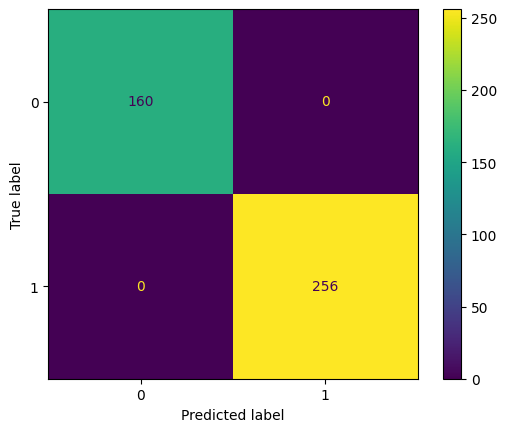

In [62]:
# Confusion Matrix Data Train - Display
ConfusionMatrixDisplay(cm_rf_train).plot()

**Insight**:

1. The **prediction** results on the **train** data successfully predict **True Positives** and **True Negatives** with **100%** accuracy.  
2. The **prediction** results on the **train** data also successfully avoid **False Negatives** by **100%**, where minimizing **False Negatives** is our target.  
3. The **prediction** results on the **train** data also successfully avoid **False Positives** by **100%**.  
4. Consistent with the **recall** value, the **Random Forest** model is perfect in detecting both the **truly positive** and **truly negative** classes.

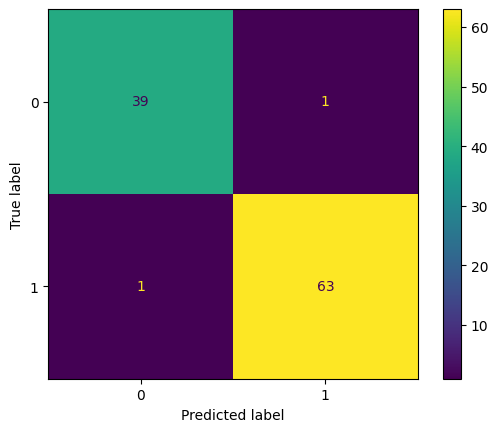

In [63]:
# Confusion Matrix Data Test - Display
ConfusionMatrixDisplay(cm_rf_test).plot()

**Insight**:

1. The **prediction** results on the **test** data successfully predict **True Positives** and **True Negatives** with **99%** accuracy.  
2. The **prediction** results on the **test** data also have minimized **False Negatives** (**My Objective**), which only amounts to **1 data point**.  
3. The **prediction** results on the **test** data also successfully minimize **False Positives**, which also only amount to **1 data point**.  
4. Consistent with the values in the **classification matrix**, the **test** data is also capable of detecting the **truly positive** and **truly negative** classes even though there is **1 data point** in both **false negatives** and **false positives**.

# **IX. Hyperparameter Tuning**

At this stage, **the main goal is to optimize the model's performance** while simultaneously **addressing the overfitting issue** evident from the perfect recall value on the training data. **This hyperparameter tuning is based on the official Scikit-Learn documentation.**

Explanation and Hyperparameter Selection  

- **n_estimators (Number of Trees in Random Forest)**  
  The default value of n_estimators is 100, but for stability and better performance, it is recommended to use a larger value like 200 or 300. Using a higher number helps **reduce variance caused by predictions**.

- **max_depth (Tree Depth)**  
  Tree depth controls how complex the rules are that predict the positive/negative class. If the tree is too deep, the model may become too complex and end up **overfitting (too closely fitting the training data)**, so I limit the maximum depth to 10 to keep the model simpler.

- **min_samples_split (Minimum Number of Samples to Split a Node)**  
  This determines the minimum number of samples needed to split a node into branches. If this minimum number is too low, trees become very detailed, which can lead to **overfitting**. Therefore, I set the minimum at 5.

- **min_samples_leaf (Minimum Number of Samples at Leaf Nodes)**  
  This helps avoid leaves containing very few samples that might not be representative. Values from 1 to 3 are commonly used to balance bias and variance.

- **max_features (Number of Features Selected When Splitting a Node)**  
  This parameter adds variation between trees by limiting features considered at each split. Settings like 'sqrt' or 'log2' are often used for classification to **reduce correlation between trees and avoid overfitting**.

- **bootstrap (Sampling with Replacement)**  
  If True, Random Forest uses bootstrap sampling (sampling with replacement) creating unique training subsets for each tree, which is important for model stability.

- **class_weight (Class Weight Adjustment for Imbalanced Data)**  
  This helps the model handle class imbalance by assigning different weights to each class. The 'balanced' option automatically adjusts weights according to class frequencies.

References:  
- [RandomForestClassifier — Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow - 2nd Edition by Aurélien Géron](http://14.139.161.31/OddSem-0822-1122/Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition-Aurelien-Geron.pdf)

In [64]:
#Determining the parameters
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20], 
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

In [65]:
# StratifiedKFold to maintain class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV for Random Forest
rf_gridcv = GridSearchCV(estimator=pipeline_rf,
                         param_grid=param_grid_rf,
                         cv=cv,
                         scoring='recall',
                         n_jobs=-1
                         )

# Training the model
rf_gridcv.fit(X_train, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender']),
                                                                        ('yes_no',
                                                                         OrdinalEncoder(categories=[['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes...
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__class_weight': ['balanced',
                                                      'balanced_subsample'],
                         'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [2, 4, 6],
                         'classifier__min_samples_split': [5, 10, 15],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='recall')

In [66]:
# Best Result
rf_gridcv.best_params_

{'classifier__bootstrap': True,
 'classifier__class_weight': 'balanced',
 'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [67]:
# Check best score
rf_gridcv.best_score_

0.956862745098039

In [68]:
# Extracting the best model and assigning it to a new variable
rf_gridcv_best = rf_gridcv.best_estimator_

In [69]:
# Check model performance on train and test set after Hyperparameter Tuning
y_pred_rf_train_tuning = rf_gridcv_best.predict(X_train)
y_pred_rf_test_tuning = rf_gridcv_best.predict(X_test)

print("Classification Report After Tuning (Training Data) - Random Forest:")
print(classification_report(y_train_encoded, y_pred_rf_train_tuning))
print("-" * 70)
print("Classification Report After Tuning (Test Data) - Random Forest:")
print(classification_report(y_test_encoded, y_pred_rf_test_tuning))

Classification Report After Tuning (Training Data) - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       160
           1       0.99      0.98      0.99       256

    accuracy                           0.99       416
   macro avg       0.98      0.99      0.98       416
weighted avg       0.99      0.99      0.99       416

----------------------------------------------------------------------
Classification Report After Tuning (Test Data) - Random Forest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



In [70]:
# Evaluation of the model on training data before hyperparameter tuning
df_recall_train

,Recall 0,Recall 1
KNN,0.97500,0.949219
SVM,0.96875,0.996094
Decision Tree,1.00000,1.000000
Random Forest,1.00000,1.000000
XGBoost,1.00000,1.000000


In [71]:
# Evaluation of the model on test data before hyperparameter tuning
df_recall_test

,Recall 0,Recall 1
KNN,0.975,0.890625
SVM,0.975,0.984375
Decision Tree,1.000,0.968750
Random Forest,0.975,0.984375
XGBoost,1.000,0.968750


**Insight**:

From the tuning results, I found the following differences:

1. After hyperparameter tuning, **recall for the positive class (1) in the training data dropped from 1 to 0.98**, and **the negative class (0) dropped from 0.96 to 0.95**.  
2. This decline in recall shows the model has become **more general and no longer overfits the training data excessively**.  
3. The main focus of this model is to **minimize false negatives**, because false negatives mean that patients who actually have diabetes are not detected, thus **the risk of serious complications increases due to the absence of early intervention**.  
4. With this, it is expected that the tuned model is **reliable in the context of early diabetes detection**, which aims at **preventing more severe risks in the future**.

Confusion Matrix : 


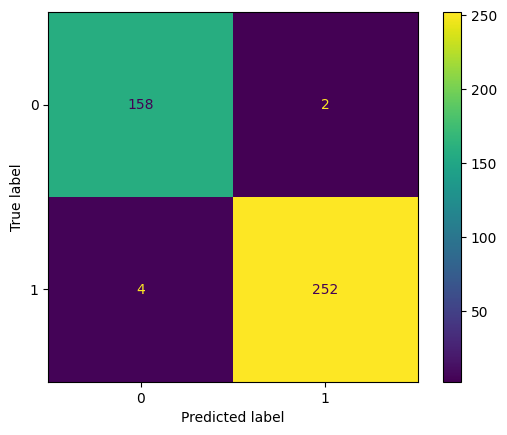

In [72]:
# Visualization of Confusion Matrix on training data
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_train, y_train_encoded))

**Insight**:

1. False Negatives became **4**, which was previously 0 before tuning. The performance indeed dropped slightly, but this aligns with the goal that a model that is **too perfect tends to overfit** and lacks generalization.  
2. False Positives increased slightly to **2** (from 0 previously). This is not very dangerous because patients detected as positive although actually negative will be more cautious and can conduct further examinations without serious clinical risk.  
3. True Positive (TP) and True Negative (TN) are still **very good**, evident from the large counts on the main diagonal of the confusion matrix (252 TP and 158 TN), showing the model remains reliable in accurately detecting positive and negative cases.

Confusion Matrix : 


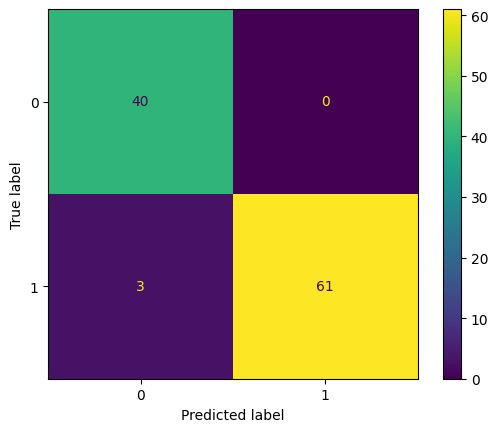

In [73]:
# Visualization of Confusion Matrix on test data
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test, y_test_encoded))

**Insight**:

1. **The recall decrease for class 1 in test data from previously 1 to 3 (False Negatives increased to 3)** proves that the model performance was reduced intentionally to **avoid overfitting**.  
2. **Recall for class 0 remained unchanged**, but it is less important in the business context.  
3. True Positive (TP) and True Negative (TN) are also **good**, as seen from the False Negative (FN) and False Positive (FP) values.

Cross Val before tuning

In [74]:
# Check cross-validation before tuning
scoresModel_RF = cross_val_score(pipeline_rf, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Random Forest Before Tuning:", scoresModel_RF)
print("Average Recall Random Forest Before Tuning:", scoresModel_RF.mean())
print("Standard Deviation Recall Random Forest Before Tuning:", scoresModel_RF.std())

Cross Validation Recall Scores Random Forest Before Tuning: [1.         0.92941176 0.96470588]
Average Recall Random Forest Before Tuning: 0.9647058823529412
Standard Deviation Recall Random Forest Before Tuning: 0.02881752638568444


Cross Val after tuning

In [75]:
# Check cross-validation after tuning
scoresModel_RF = cross_val_score(rf_gridcv_best, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Random Forest After Tuning:", scoresModel_RF)
print("Average Recall Random Forest After Tuning:", scoresModel_RF.mean())
print("Standard Deviation Recall Random Forest After Tuning:", scoresModel_RF.std())

Cross Validation Recall Scores Random Forest After Tuning: [1.         0.91764706 0.95294118]
Average Recall Random Forest After Tuning: 0.956862745098039
Standard Deviation Recall Random Forest After Tuning: 0.033734608890363255


**Insight**:

1. From the **cross-validation recall** results, before tuning the Random Forest obtained an average recall value of approximately **0.965** with a standard deviation of about **0.029**, whereas after tuning the average recall slightly dropped to around **0.957** with the standard deviation increased to approximately **0.034**.  
2. This change indicates that the recall performance of the model post-tuning is **relatively stable** and not far different from before tuning, even though the standard deviation increased slightly, this condition is still acceptable in a business context for **minimizing false negatives**.  
3. The tuning model **did not significantly reduce performance**, but maintained a balance between model stability and the ability to detect positive cases (recall on class 1) at a high level.  
4. This is particularly important in medical contexts, where **minimizing false negatives is critical** for early disease detection such as diabetes.  
5. Overall, tuning on the Random Forest yields balanced results without overfitting, with recall remaining high and fairly consistent in cross-validation, supporting the business goal to **reduce the risk of missed detection (false negative)**.

# **X. Model Saving**

In [76]:
#save model random forest after tuning with pickle
with open('model_Diabetes_Early_Detection.pkl', 'wb' ) as file:
    pickle.dump(rf_gridcv_best, file)

# **XI. Model Inference**

Inference is performed in the file Diabetes_ED_Inference.ipynb

# **XII. Conclusion**

**Relationship Between EDA and the Model**

Based on the overall process of exploratory data analysis (EDA) and machine learning model evaluation, a clear thread is found that explains how **patterns in the data directly affect the model’s working mechanism and prediction results**:

1. **Dominant symptoms such as polyuria, polydipsia, and muscle stiffness** were found in the majority of patients with positive diabetes status. Out of a total of 320 positive patients, **more than 60% experienced both polyuria and polydipsia simultaneously**, and most of the rest had at least one of the three symptoms, including muscle stiffness.

2. The **machine learning model learns from this pattern**, so when detecting the presence of any of *polyuria*, *polydipsia*, or *muscle stiffness*, the **model is very likely to predict "Positive"**, even if the other symptoms are "No". This causes the model to have a **high recall** (rarely missing positive cases), but risks increasing **false positives** in patients who are actually negative.

3. There were also **asymptomatic cases** (without symptoms) detected as positive, although very few in number. This indicates the importance of considering mild symptoms or other risk factors that have not yet been incorporated.

4. **Some features like obesity and delayed healing** were not proven significant for diabetes status at the early stage. However, these features are kept because they remain clinically relevant and can enrich the detection context in certain cases.

5. Evaluation results show that the model has a **bias toward female patients aged 33 and above**, especially in detecting the negative class. This also aligns with model testing results that show in this group, the model struggles to read negative patterns even when all symptoms are "No". This is most likely due to **insufficient data** from this group within the dataset.

---

**Recommendations for Model Development**

- **Improve data distribution** by increasing the number of female patients aged >33 years, especially those with negative status, to reduce model bias.  
- Perform **advanced feature engineering** by adding new features such as family history, dietary patterns, and physical activity to make the model more contextual.  
- Consider **threshold tuning** or calibration methods to avoid automatic "positive" predictions just because one symptom is strong.  
- Evaluate the model using **fairness metrics and stratification of performance by gender and age** so that model disparities are more measurable and can be systematically corrected.